## Список признаков

1. Любимый цвет - 3 значения
2. Любимый музыкальный жанр - 7 значений
3. Любимый алкогольный напиток - 6 значений
4. Любимый безалкогольный напиток - 4 значения
5. Пол

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC

In [122]:
df = pd.read_csv("Transformed Data Set - Sheet1.csv")

In [10]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [11]:
print(f'Colors: {df["Favorite Color"].unique()}\n')
print(f'Music Genres: {df["Favorite Music Genre"].unique()}\n')
print(f'Beverages: {df["Favorite Beverage"].unique()}\n')
print(f'Soft Drinks: {df["Favorite Soft Drink"].unique()}\n')
print(f'Genders: {df["Gender"].unique()}\n')

Colors: ['Cool' 'Neutral' 'Warm']

Music Genres: ['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']

Beverages: ['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']

Soft Drinks: ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']

Genders: ['F' 'M']



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [123]:
df = df.drop(['Favorite Color'], axis=1)

Данные без пропусков

Так как все признаки, кроме пола,- номинальные, необходимо перевести их при помощи one hot encoding 

In [124]:
ohe_df = pd.get_dummies(df)
ohe_df['Gender'] = np.where(ohe_df['Gender_M'] == 1, 1, 0)
ohe_df = ohe_df.drop(['Gender_M', 'Gender_F'], axis=1)

In [97]:
df["Gender"].value_counts()

F    33
M    33
Name: Gender, dtype: int64

Число мужчин и женщин в выборке распределено равномерно

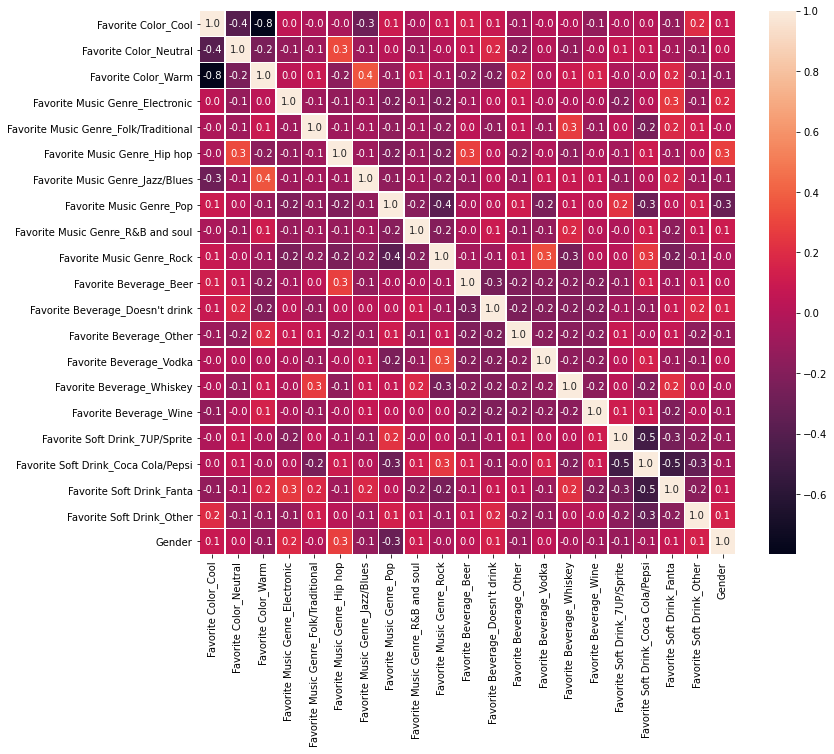

In [26]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(ohe_df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);

Корреляция не выражена явно, к наиболее важным признакам можно отнести любимый музыкальный жанр, рассмотрим распределение по этому параметру

<AxesSubplot:xlabel='Favorite Music Genre', ylabel='count'>

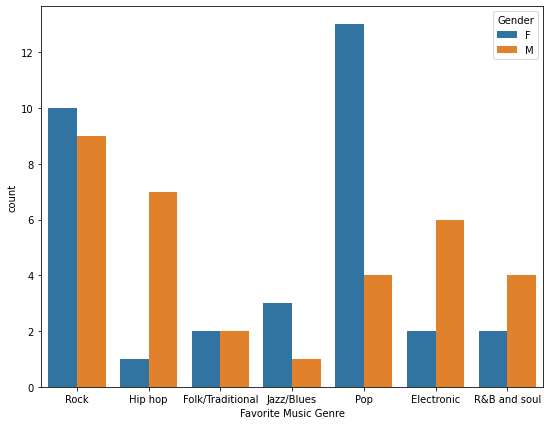

In [33]:
f, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Favorite Music Genre', hue='Gender', data=df, ax=ax)

Так же рассмотрим предпочтения в безалкогольных напитках

<AxesSubplot:xlabel='Favorite Soft Drink', ylabel='count'>

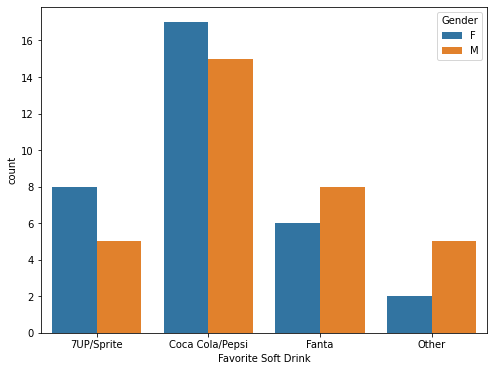

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Favorite Soft Drink', hue='Gender', data=df, ax=ax)

Разобьем выборку на обучающую и тестовую

In [125]:
y = ohe_df.pop('Gender')
X = ohe_df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Далее приводятся результаты без использования цветовых предпочтений (Favorite Color) опрашиваемых, так как именно без этого признака удалось достигнуть наиболее высоких качественных показателей классификации

В конце ноутбука представлены таблицы лучших результатов при разных наборах признаков

## Метод k ближайших соседей

Определим k при наибольшем показателе точности

In [126]:
neightbors = range(1, 50)
knn_bp = {'k' : -1, 'acc' : -1}
for k in neightbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    acc = knn_model.score(X_test, y_test)
    if(acc > knn_bp['acc']):
        knn_bp['acc'] = acc
        knn_bp['k'] = k

print(f"Число соседей: {knn_bp['k']},\nНаибольшая точность: {knn_bp['acc']}")

Число соседей: 4,
Наибольшая точность: 0.6428571428571429


              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.67      0.57      0.62         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14



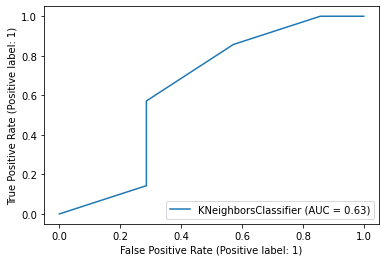

In [127]:
knn_model = KNeighborsClassifier(knn_bp['k'])
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
print(classification_report(y_test, knn_prediction))
plot_roc_curve(knn_model, X_test, y_test)
plt.show()

## Линейный классификатор (логистическая регрессия)

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.86      0.67      0.75         9

    accuracy                           0.71        14
   macro avg       0.71      0.73      0.71        14
weighted avg       0.76      0.71      0.72        14



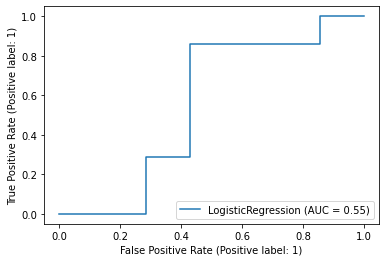

In [128]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_prediction = log_model.predict(X_test)
print(classification_report(log_prediction, y_test))
plot_roc_curve(log_model, X_test, y_test)
plt.show()

## Метод опорных векторов (SVM)

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.86      0.67      0.75         9

    accuracy                           0.71        14
   macro avg       0.71      0.73      0.71        14
weighted avg       0.76      0.71      0.72        14



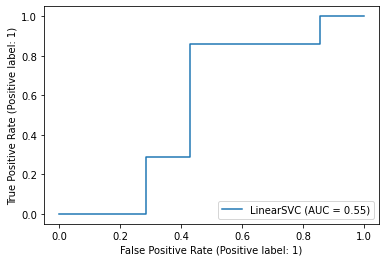

In [129]:
svm_model = LinearSVC(C=2)
svm_model.fit(X_train, y_train)
svm_prediction = svm_model.predict(X_test)
print(classification_report(svm_prediction, y_test))
plot_roc_curve(svm_model, X_test, y_test)
plt.show()

## Персептрон

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.43      0.50      0.46         6

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.51      0.50      0.50        14



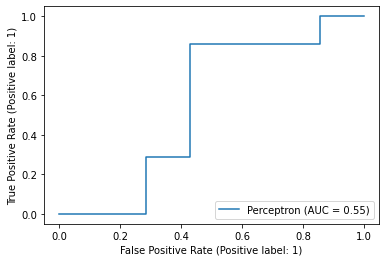

In [130]:
perceptron_model = Perceptron(penalty='l2',tol=1e-2, random_state=1)
perceptron_model.fit(X_train, y_train)
perceptron_prediction = perceptron_model.predict(X_test)
print(classification_report(perceptron_prediction, y_test))
plot_roc_curve(perceptron_model, X_test, y_test)
plt.show()

Результаты при использовании всего данного пространства признаков:

|Метод |f1-мера|Параметры|
|----- |------|---------|
|  kNN |0.71  |k = 34|
|Логистическая регрессия|0.56  |-|
|SVM   |0.64  |C = 10|
|Персептрон|0.64|l2, tol*=0.1|

tol - разница ошибок на текущей и предыдущей итерациях



Результаты при учете предпочтений только к безалкогольным напиткам и музыкальным жанрам:

|Метод |f1-мера|Параметры|
|----- |------|---------|
|  kNN |0.71  |k = 7|
|Логистическая регрессия|0.71  |-|
|SVM   |0.71  |C = 2|
|Персептрон|0.6|l2, tol*=0.01|